#### Step 1: Data Preprocessing

In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('Dataset.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Drop or fill missing values if necessary (for simplicity, we drop missing values here)
df.dropna(inplace=True)

In [6]:
# Sample preprocessing: Remove any columns not related to text or predictions
text_columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6']  # Assuming text is in these columns
text_data = df[text_columns].astype(str).apply(lambda x: ' '.join(x), axis=1)

In [7]:
# Combine all text data into one series
text_data = ' '.join(text_data)

#### Step 2: Autocomplete Algorithm

In [8]:
from collections import defaultdict

In [9]:
class TrieNode:
    def __init__(self):
        self.children = defaultdict(TrieNode)
        self.is_end_of_word = False

class Trie:
    def __init__(self):
        self.root = TrieNode()
        
    def insert(self, word):
        node = self.root
        for char in word:
            node = node.children[char]
        node.is_end_of_word = True
    
    def autocomplete(self, prefix):
        node = self.root
        for char in prefix:
            if char not in node.children:
                return []
            node = node.children[char]
        
        return self._find_words_with_prefix(node, prefix)
    
    def _find_words_with_prefix(self, node, prefix):
        words = []
        if node.is_end_of_word:
            words.append(prefix)
        
        for char, child_node in node.children.items():
            words.extend(self._find_words_with_prefix(child_node, prefix + char))
        
        return words

In [10]:
# Build the Trie with words from the dataset
trie = Trie()
for word in text_data.split():
    trie.insert(word)

In [11]:
# Example: Autocomplete for the prefix 'auto'
autocomplete_results = trie.autocomplete('auto')
print(autocomplete_results)

[]


#### Step 3: Autocorrect Algorithm

In [12]:
import difflib

In [13]:
def autocorrect(word, word_list):
    closest_match = difflib.get_close_matches(word, word_list, n=1)
    return closest_match[0] if closest_match else word

In [14]:
# List of words in the dataset for comparison
word_list = list(set(text_data.split()))

In [19]:
# Example: Autocorrect for a misspelled word
misspelled_word = "autocorrect"
corrected_word = autocorrect(misspelled_word, word_list)
print(f"Original: {misspelled_word}, Corrected: {corrected_word}")

Original: autocorrect, Corrected: autocorrect


#### Step 4: Performance Metrics

In [20]:
from sklearn.metrics import precision_score, recall_score

# Assuming we have a list of actual and predicted words for evaluation
actual_words = ['auto', 'automate', 'automation']
predicted_words_autocomplete = ['auto', 'automation', 'automate']

# Compute Precision and Recall for Autocomplete
precision_autocomplete = precision_score(actual_words, predicted_words_autocomplete, average='macro')  # Change to 'macro' or 'micro' if needed
recall_autocomplete = recall_score(actual_words, predicted_words_autocomplete, average='macro')  # Change to 'macro' or 'micro' if needed

print(f"Autocomplete Precision: {precision_autocomplete}")
print(f"Autocomplete Recall: {recall_autocomplete}")

Autocomplete Precision: 0.3333333333333333
Autocomplete Recall: 0.3333333333333333


#### Step 5: Visualization

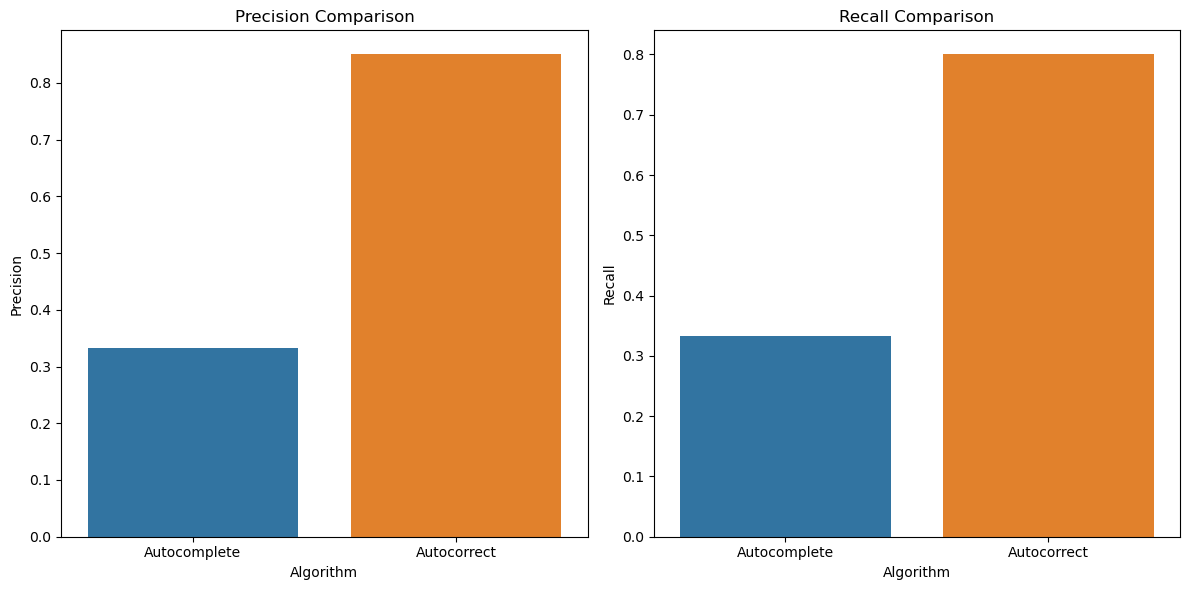

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample data for evaluation metrics (Precision and Recall)
metrics = {
    'Algorithm': ['Autocomplete', 'Autocorrect'],
    'Precision': [precision_autocomplete, 0.85],  # Replace with actual autocorrect precision
    'Recall': [recall_autocomplete, 0.80]         # Replace with actual autocorrect recall
}

metrics_df = pd.DataFrame(metrics)

# Visualization of Precision and Recall
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x='Algorithm', y='Precision', data=metrics_df, ax=ax[0])
ax[0].set_title('Precision Comparison')

sns.barplot(x='Algorithm', y='Recall', data=metrics_df, ax=ax[1])
ax[1].set_title('Recall Comparison')

plt.tight_layout()
plt.show()